In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns   
from scipy import stats
%matplotlib inline

In [2]:
previous_application=pd.read_csv("previous_application.csv")
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
previous_application.shape

(1670214, 37)

In [7]:
previous_application.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

In [8]:
def type_features(data):
    categorical_features = data.select_dtypes(include = ["object"]).columns
    numerical_features = data.select_dtypes(exclude = ["object"]).columns
    print( "categorical_features :",categorical_features)
    print("numerical_features:",numerical_features)

In [9]:
type_features(previous_application)

categorical_features : Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')
numerical_features: Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


C:\Users\abc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'customer Down payment Amount Distribution')

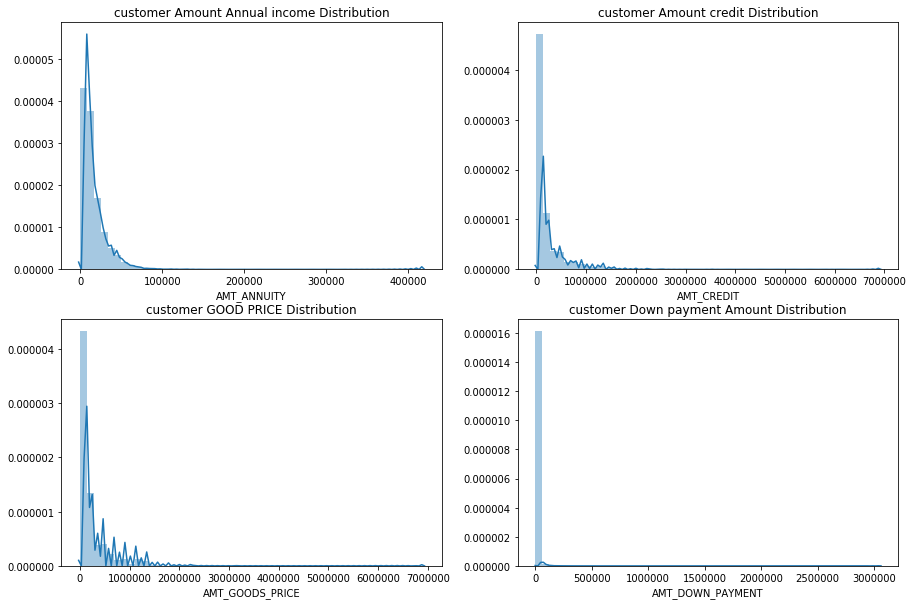

In [10]:
f, ax = plt.subplots(2,2, figsize=(15, 10))
sns.distplot(previous_application.AMT_ANNUITY.dropna(), kde=True, ax=ax[0,0]).set_title('customer Amount Annual income Distribution')
sns.distplot(previous_application.AMT_CREDIT.dropna(), kde=True, ax=ax[0,1]).set_title('customer Amount credit Distribution')
sns.distplot(previous_application.AMT_GOODS_PRICE.dropna(), kde=True, ax=ax[1,0]).set_title('customer GOOD PRICE Distribution')
sns.distplot(previous_application.AMT_DOWN_PAYMENT.dropna(), kde=True, ax=ax[1,1]).set_title('customer Down payment Amount Distribution')

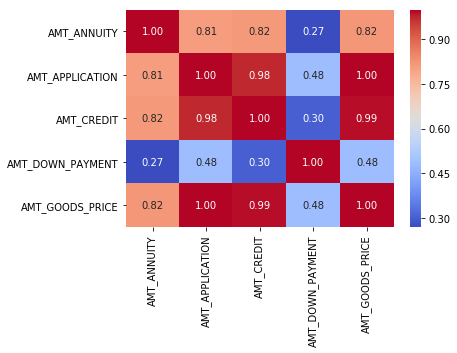

In [13]:
g = sns.heatmap(previous_application[['AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

Text(0.5, 0, 'RATE_DOWN_PAYMENT')

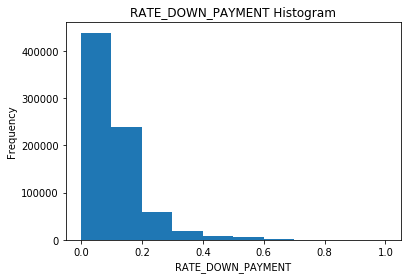

In [18]:
previous_application['RATE_DOWN_PAYMENT'].plot.hist(title = 'RATE_DOWN_PAYMENT Histogram');
plt.xlabel('RATE_DOWN_PAYMENT')

#'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'

Text(0.5, 0, 'RATE_INTEREST_PRIMARY')

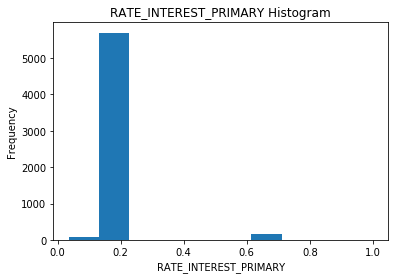

In [19]:
previous_application['RATE_INTEREST_PRIMARY'].plot.hist(title = 'RATE_INTEREST_PRIMARY Histogram');
plt.xlabel('RATE_INTEREST_PRIMARY')

#outlier present

Text(0.5, 0, 'RATE_INTEREST_PRIVILEGED')

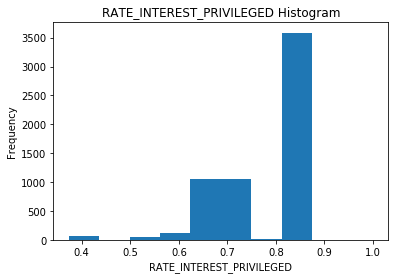

In [20]:
previous_application['RATE_INTEREST_PRIVILEGED'].plot.hist(title = 'RATE_INTEREST_PRIVILEGED Histogram');
plt.xlabel('RATE_INTEREST_PRIVILEGED')

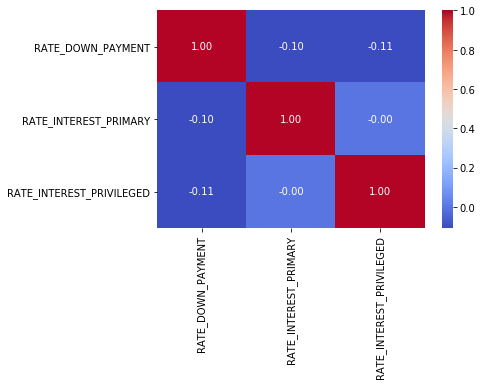

In [21]:
g = sns.heatmap(previous_application[['RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

Text(0.5, 0, 'DAYS_DECISION')

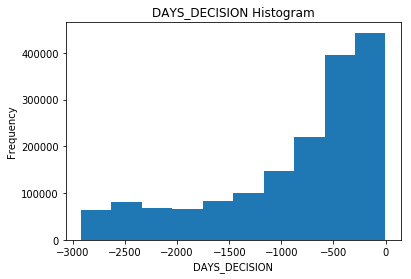

In [22]:
previous_application['DAYS_DECISION'].plot.hist(title = 'DAYS_DECISION Histogram');
plt.xlabel('DAYS_DECISION')





Text(0.5, 0, 'SELLERPLACE_AREA')

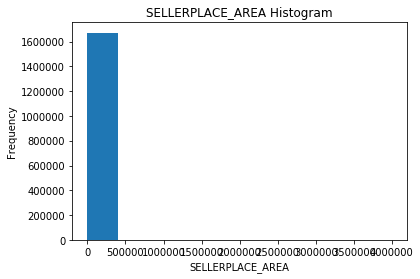

In [23]:
previous_application['SELLERPLACE_AREA'].plot.hist(title = 'SELLERPLACE_AREA Histogram');
plt.xlabel('SELLERPLACE_AREA')


Text(0.5, 0, 'CNT_PAYMENT')

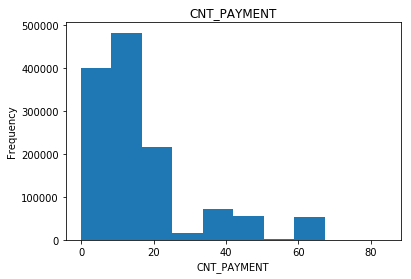

In [24]:
previous_application['CNT_PAYMENT'].plot.hist(title = 'CNT_PAYMENT');
plt.xlabel('CNT_PAYMENT')

Text(0.5, 0, 'DAYS_FIRST_DRAWING')

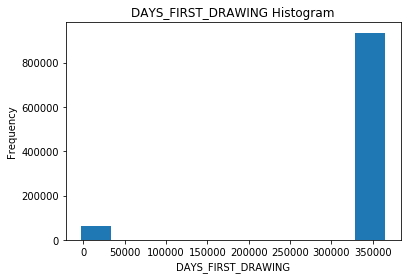

In [25]:
previous_application['DAYS_FIRST_DRAWING'].plot.hist(title = 'DAYS_FIRST_DRAWING Histogram');
plt.xlabel('DAYS_FIRST_DRAWING')

Text(0.5, 0, 'DAYS_FIRST_DUE')

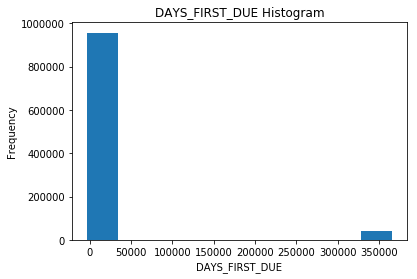

In [26]:
previous_application['DAYS_FIRST_DUE'].plot.hist(title = 'DAYS_FIRST_DUE Histogram');
plt.xlabel('DAYS_FIRST_DUE')

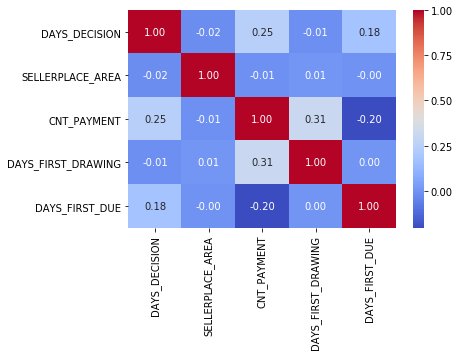

In [27]:
g = sns.heatmap(previous_application[['DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

Text(0.5, 0, 'DAYS_LAST_DUE_1ST_VERSION')

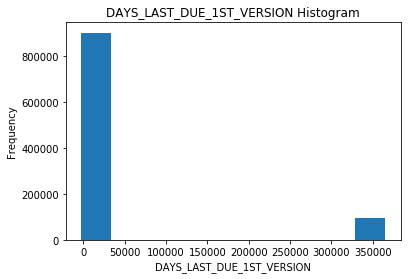

In [30]:
previous_application['DAYS_LAST_DUE_1ST_VERSION'].plot.hist(title = 'DAYS_LAST_DUE_1ST_VERSION Histogram');
plt.xlabel('DAYS_LAST_DUE_1ST_VERSION')





Text(0.5, 0, 'DAYS_TERMINATION')

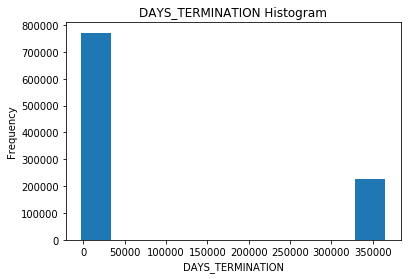

In [29]:
previous_application['DAYS_TERMINATION'].plot.hist(title = 'DAYS_TERMINATION Histogram');
plt.xlabel('DAYS_TERMINATION')

Text(0.5, 0, 'NFLAG_INSURED_ON_APPROVAL')

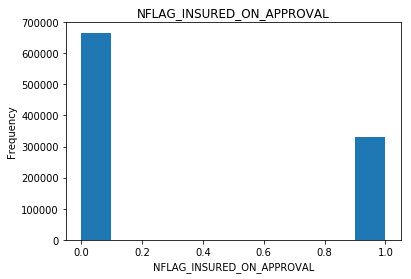

In [28]:
previous_application['NFLAG_INSURED_ON_APPROVAL'].plot.hist(title = 'NFLAG_INSURED_ON_APPROVAL');
plt.xlabel('NFLAG_INSURED_ON_APPROVAL')

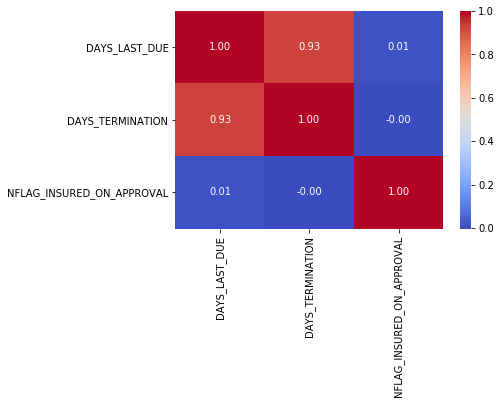

In [31]:
g = sns.heatmap(previous_application[['DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")